In [185]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
env = gym.make('FrozenLake-v0')

[2017-09-05 15:50:44,478] Making new env: FrozenLake-v0


In [187]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [188]:
print "Number of actions : {}".format(env.action_space.n)
print "Number of observable states : {}".format(env.observation_space.n)

Number of actions : 4
Number of observable states : 16


In [189]:
Q_table = np.zeros((env.observation_space.n, env.action_space.n))

In [190]:
print Q_table

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [191]:
n_episodes = 2000
lr = 0.8
gamma = 0.95
rList = []
sList = []

In [192]:
for i in range(n_episodes):
    s = env.reset()
    tot_reward = 0
    done = False
    for step in range(100):
        a = np.argmax(Q_table[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        next_state, reward, done, _ = env.step(a)
        Q_table[s,a] = (1-lr)*Q_table[s,a] + lr * (reward + gamma * np.max(Q_table[next_state,:]))
        tot_reward += reward
        s = next_state
        if done == True:
            break
    rList.append(tot_reward)
    sList.append(step+1)

In [193]:
def plot_list(arr, y_label, interval=100):
    plot_values = []
    for i in range(0,len(arr)-interval,interval):
        plot_values.append(sum(arr[i:i+100])/100)
    plt.plot(plot_values)
    plt.ylabel(y_label)
    plt.xlabel("Time")
    plt.show()

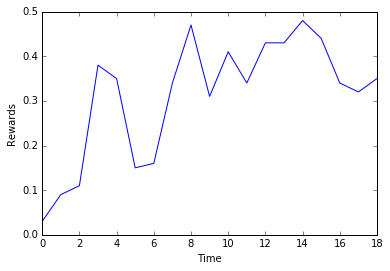

In [194]:
plot_list(rList, "Rewards")

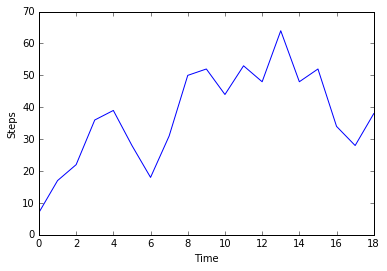

In [195]:
plot_list(sList, "Steps")

In [196]:
print Q_table

[[  2.33924538e-03   3.91476949e-03   1.38052418e-01   2.28185238e-03]
 [  5.00952195e-04   7.61875706e-04   4.50471750e-04   3.29434308e-02]
 [  4.03651926e-04   9.81022165e-04   2.46606538e-03   1.87304226e-02]
 [  2.06093145e-05   3.74177745e-04   8.18047922e-05   1.11152248e-02]
 [  1.25321017e-01   1.45121535e-03   8.75357383e-04   9.99482712e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.95435797e-04   1.88358187e-06   1.59308799e-04   1.20099627e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.01374910e-05   4.81602608e-03   2.61609667e-03   5.06047790e-02]
 [  1.05645882e-03   4.83303781e-01   1.22518644e-03   2.92582590e-04]
 [  1.50539336e-03   2.19279732e-04   4.85125457e-04   1.94701071e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.39934975e-03   5.12650965e-03   5.78592815e-01   1.19735743e-03]
 [  0.